# Let's get started! ⚡

In [1416]:
## import Module

# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier

# Data Reading

In [1417]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [1418]:
# 헤드 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1419]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


# Exploratory Data Analysis 📊🤔

## 생존여부와 데이터별 인덱스 분리

In [1420]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

## 학습데이터와 테스트데이터 프레임 합치기

In [1421]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

In [1422]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [1423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


## 결측치 채우기 위한 분석

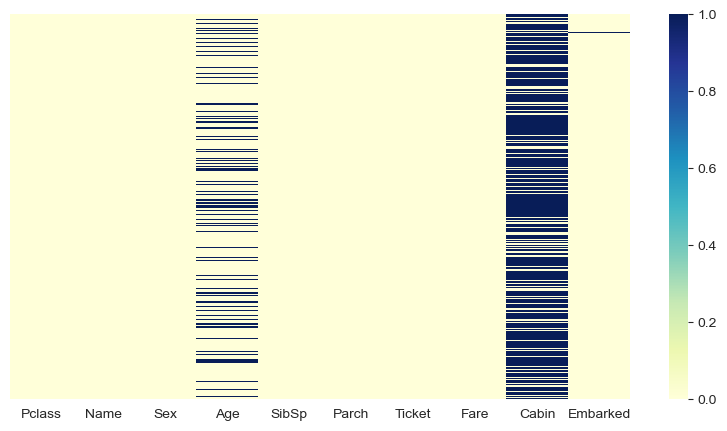

In [1424]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [1425]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [1426]:
data[data.Embarked.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [1427]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

Embarked
S    177
C    141
Q      3
Name: count, dtype: int64

<Axes: xlabel='Sex'>

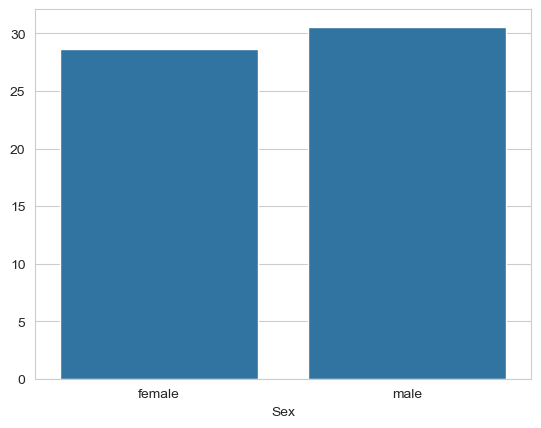

In [1428]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [1429]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

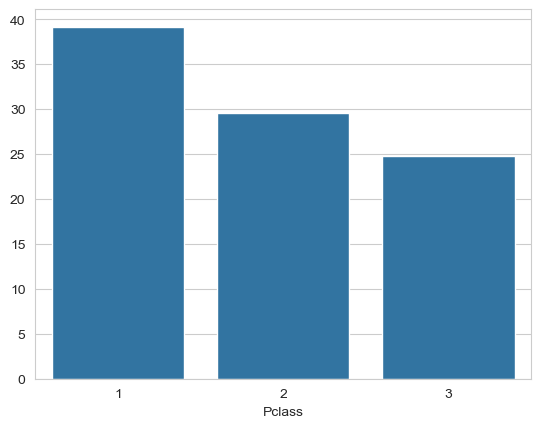

In [1430]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [1431]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [1432]:
data[data.Fare.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


<Axes: xlabel='Fare', ylabel='Count'>

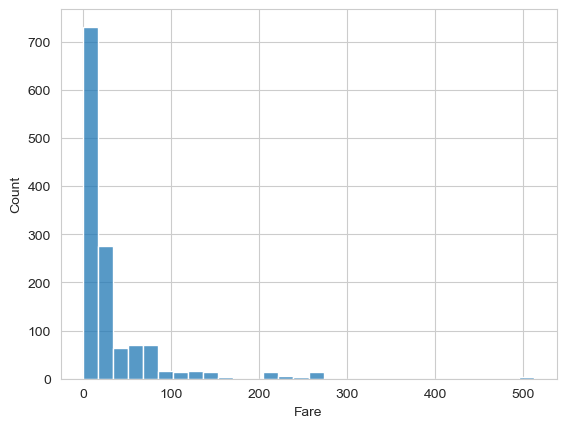

In [1433]:
sns.histplot(data.Fare,bins=30)

In [1434]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [1435]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

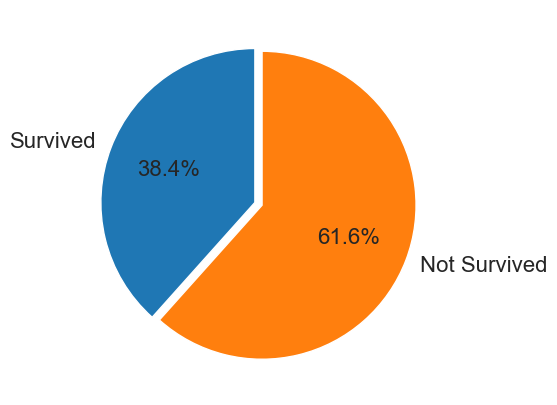

In [1436]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart 
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [1437]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [1438]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [1439]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

,mean,min,max
Survived,,,
0,22.117887,0.0,263.0000
1,48.395408,0.0,512.3292


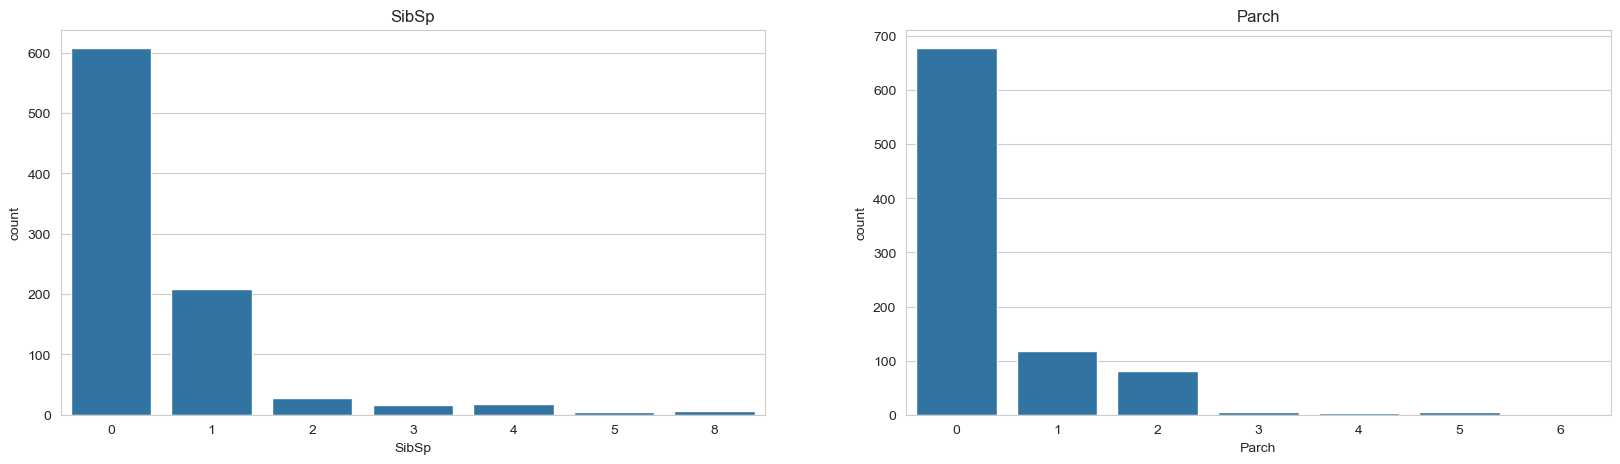

In [1440]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0]) 
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [1441]:
data['Family'] = data['SibSp']+data['Parch']
#data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [1442]:
data_exp.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: count, Length: 730, dtype: int64

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

In [1443]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)
    return data

In [1444]:
# 'Name' 컬럼에서 'honorific_title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'honorific_title' 생성하는 함수
def get_honorific_title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    honorific_title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if honorific_title in top4_titles:
        return honorific_title
    elif honorific_title in female_titles_to_Mrs:
        return 'Mrs'
    elif honorific_title in female_titles_to_Miss:
        return 'Miss'
    elif honorific_title in male_titles_to_Mr:
        return 'Mr'
    else:
        return honorific_title

In [1445]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_honorific_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['honorific_title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['honorific_title'].isin(title_on_both_side))
    
    # 치환
    df.loc[cond_mr, 'honorific_title'] = 'Mr'
    df.loc[cond_mrs, 'honorific_title'] = 'Mrs'
    
    return df

In [1446]:
# 새 피쳐로 사용할 컬럼 'honorific_title' 생성
def make_honorific_title(df=None):
    df['honorific_title'] = df['Name'].map(get_honorific_title)
    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_honorific_title_on_both_side(df)
    return df

In [1447]:
# 원래 컬럼 'Name'를 드랍
def drop_Name(df=None):
    df = df.drop(columns=['Name'])    
    return df

In [1448]:
# 'Cabin' 컬럼 드랍
def drop_Cabin(df=None):
    df = df.drop(columns=['Cabin'])    
    return df

In [1449]:
# 'Family' 컬럼 계산해서 생성
def make_Family_column(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1    
    return df

## 1차 전처리 함수 모음

In [1450]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)
    
    # 호칭 만들기
    df = make_honorific_title(df)
    
    # 'Name' 컬럼 드랍
    df = drop_Name(df)
    
    # 'Cabin' 컬럼 드랍
    df = drop_Cabin(df)
    
    # 'Family' 컬럼 만들기
    df = make_Family_column(df)
       
    return df

In [1451]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

<Axes: xlabel='honorific_title'>

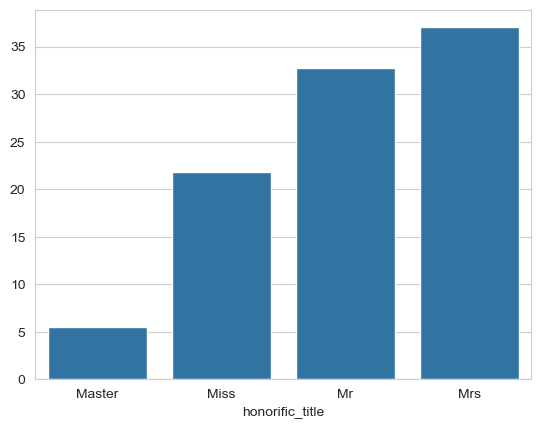

In [1452]:
# 'honorific_title'에 따른 'Age' 분포 표시
sns.barplot(x=df.groupby('honorific_title')['Age'].agg(np.mean).index, y=df.groupby('honorific_title')['Age'].agg(np.mean).values)

In [1453]:
df.groupby('honorific_title')['Age'].agg(np.mean)

honorific_title
Master     5.482642
Miss      21.824366
Mr        32.784298
Mrs       37.040000
Name: Age, dtype: float64

In [1454]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,honorific_title,Family
0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,3,male,35.0,0,0,373450,8.0500,S,Mr,1


## 2차 전처리 함수 선언

### Imputer 함수 선언

In [1455]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    def fn(honorific_title=None, age=None):
        if np.isnan(age):
            if honorific_title == 'Master':
                return 5.48
            elif honorific_title == 'Miss':
                return 21.82
            elif honorific_title == 'Mr':
                return 32.78
            elif honorific_title == 'Mrs':
                return 37.04
        else:
            return age
    
    df['Age'] = df[['honorific_title', 'Age']].apply(lambda x: fn(x['honorific_title'], x['Age']),axis=1)
    df['Age'] = df['Age'].astype('int64')
    
    return df

In [1456]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    def fn(pclass=None, fare=None):
        if np.isnan(fare):
            if pclass == 1:
                return 87.51
            elif pclass == 2:
                return 21.18
            elif pclass == 3:
                return 13.30
        else:
            return fare
    
    df['Fare'] = df[['Pclass', 'Fare']].apply(lambda x: fn(x['Pclass'], x['Fare']),axis=1)
    
    return df

In [1457]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df=None):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    
    return df

In [1458]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 결측치 채운 후 전처리 함수 선언

In [1459]:
# 'Ticket' 컬럼 레이블 인코딩
def label_encoding_Ticket(df=None):
    encoder = LabelEncoder()
    df['Ticket'] = encoder.fit_transform(df['Ticket'])
    return df

In [1460]:
#  일부 컬럼 한정 원핫 인코딩
def one_hot_encoder(df=None):
    # 'Sex' 컬럼
    df = pd.concat([df, pd.get_dummies(df['Sex'], drop_first=True)], axis=1)
    df.drop('Sex', axis=1, inplace=True)
    
    # 'Embarked' 컬럼
    df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)
    df.drop('Embarked', axis=1, inplace=True)
    
    # 'honorific_title' 컬럼
    df = pd.concat([df, pd.get_dummies(df['honorific_title'])], axis=1)
    df.drop('honorific_title', axis=1,inplace=True)
    
    # 'Pclass' 컬럼
    df['Pclass'] = df['Pclass'].astype('object')
    df = pd.concat([df, pd.get_dummies(df['Pclass'])], axis=1)
    df.drop('Pclass', axis=1, inplace=True)
    
    return df

In [1461]:
# 'Age', 'Fare' 스케일링
def Age_Fare_scalar(df=None):
    scalar = MinMaxScaler()
    df[['Age','Fare']] = scalar.fit_transform(df[['Age','Fare']])
    return df

## 2차 전처리 함수 모음

In [1462]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)
    
    # 'Ticket' 컬럼 레이블 인코딩
    df = label_encoding_Ticket(df)
    
    # 일부 컬럼 한정 원핫 인코딩
    df = one_hot_encoder(df)
       
    # 'Age', 'Fare' 스케일링
    df = Age_Fare_scalar(df)
    
    return df

In [1463]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 2차 전처리 함수 실행 후 결과 확인

In [1464]:
df.head()

,Age,SibSp,Parch,Ticket,Fare,Family,male,C,Q,S,Master,Miss,Mr,Mrs,1,2,3
0,0.2750,1,0,720,0.014151,2,True,False,False,True,False,False,True,False,False,False,True
1,0.4750,1,0,816,0.139136,2,False,True,False,False,False,False,False,True,True,False,False
2,0.3250,0,0,914,0.015469,1,False,False,False,True,False,True,False,False,False,False,True
3,0.4375,1,0,65,0.103644,2,False,False,False,True,False,False,False,True,True,False,False
4,0.4375,0,0,649,0.015713,1,True,False,False,True,False,False,True,False,False,False,True


In [1471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
 1   SibSp   1309 non-null   int64  
 2   Parch   1309 non-null   int64  
 3   Ticket  1309 non-null   int32  
 4   Fare    1309 non-null   float64
 5   Family  1309 non-null   int32  
 6   male    1309 non-null   bool   
 7   C       1309 non-null   bool   
 8   Q       1309 non-null   bool   
 9   S       1309 non-null   bool   
 10  Master  1309 non-null   bool   
 11  Miss    1309 non-null   bool   
 12  Mr      1309 non-null   bool   
 13  Mrs     1309 non-null   bool   
 14  1       1309 non-null   bool   
 15  2       1309 non-null   bool   
 16  3       1309 non-null   bool   
dtypes: bool(11), float64(2), int32(2), int64(2)
memory usage: 75.4 KB


In [1474]:
# 컬럼명을 강제로 str로 형변환
df.columns = df.columns.astype(str)

## 학습데이터와 테스트데이터 분리

In [1475]:
train_set = df.iloc[:891,]
test_set = df.iloc[891:,]

In [1476]:
train_set.shape, test_set.shape

((891, 17), (418, 17))

# Model Fitting

## 공통 파라미터 선언

In [1477]:
model_result = pd.DataFrame(columns=['Model','Score','Parameters'])

In [1478]:
cv = RepeatedStratifiedKFold(
      n_splits=10
    , n_repeats=5
    , random_state=42
)

## LogisticRegression

In [1485]:
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2','elasticnet']
c_values = [14,15,16]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(train_set, Survived)


model_result1 = {'Model':'Logistic', 'Score':grid_result.best_score_, 'Parameters':grid_result.best_params_}
model_result.loc[0] = model_result1
print("Logistic Regression Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

logistic_submission = pd.read_csv('./gender_submission.csv')
logistic_submission.Survived = grid_result.best_estimator_.predict(test_set)
logistic_submission.to_csv('logistic_submission.csv', index=False)

Logistic Regression Best score: 0.832075 using {'C': 15, 'penalty': 'l2', 'solver': 'liblinear'}


## RidgeClassifier

In [1487]:
model = RidgeClassifier()

alpha = [1.13,1.15,1.18]
grid = dict(alpha=alpha)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_set, Survived)

# summarize results
model_result2 = {'Model':'Ridge','Score':grid_result.best_score_, 'Parameters':grid_result.best_params_}
model_result.loc[1] = model_result2
print("Ridge Regression Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Ridge_submission = pd.read_csv('./gender_submission.csv')
Ridge_submission.Survived = grid_result.best_estimator_.predict(test_set)
Ridge_submission.to_csv('Ridge_submission.csv', index=False)

Ridge Regression Best score: 0.833201 using {'alpha': 1.18}


## KNeighborsClassifier

In [1488]:
model = KNeighborsClassifier()

n_neighbors = range(15, 21)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_set, Survived)

model_result3 = {'Model':'KNeighbors','Score':grid_result.best_score_, 'Parameters':grid_result.best_params_}
model_result.loc[2] = model_result3
print("KNeighbors Regression Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


KNeighbors_submission = pd.read_csv('./gender_submission.csv')
KNeighbors_submission.Survived = grid_result.best_estimator_.predict(test_set)
KNeighbors_submission.to_csv('KNeighbors_submission.csv', index=False)

KNeighbors Regression Best score: 0.775094 using {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}


## RandomForestClassifier

In [1489]:
model = RandomForestClassifier()

n_estimators = [1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_set, Survived)

model_result4 = {'Model':'RandomForest','Score':grid_result.best_score_, 'Parameters':grid_result.best_params_}
model_result.loc[3] = model_result4
print("RandomForest Regression Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


RandomForest_submission = pd.read_csv('./gender_submission.csv')
RandomForest_submission.Survived = grid_result.best_estimator_.predict(test_set)
RandomForest_submission.to_csv('RandomForest_submission.csv', index=False)

RandomForest Regression Best score: 0.838360 using {'max_features': 'log2', 'n_estimators': 1000}


## BaggingClassifier

In [1491]:
model = BaggingClassifier()

n_estimators = [1550,1750]
grid = dict(n_estimators=n_estimators)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_set, Survived)

model_result5 = {'Model':'BaggingClassifier','Score':grid_result.best_score_, 'Parameters':grid_result.best_params_}
model_result.loc[4] = model_result5
print("BaggingClassifier Regression Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

BaggingClassifier_submission = pd.read_csv('./gender_submission.csv')
BaggingClassifier_submission.Survived = grid_result.best_estimator_.predict(test_set)
BaggingClassifier_submission.to_csv('BaggingClassifier_submission.csv', index=False)

BaggingClassifier Regression Best score: 0.848459 using {'n_estimators': 1550}


## 모델별 성능 비교

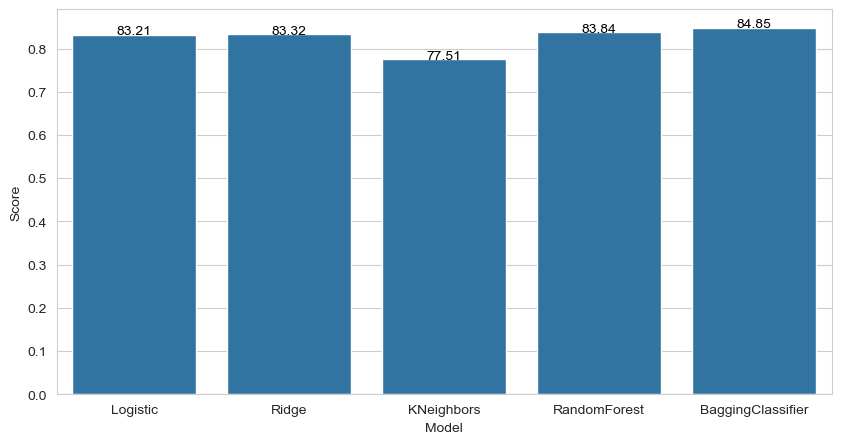

In [1492]:
plt.figure(figsize=(10,5))
g = sns.barplot(x='Model', y='Score', data=model_result)

for index, row in model_result.iterrows():
    g.text(row.name,row.Score, round(row.Score*100,2), color='black', ha="center")
plt.show()

# 채점하기

In [1505]:
# 생성된 데이터 파일과 솔루션 불러오기
# 파일 경로 적절히 수정해서 쓰세요.
submission = pd.read_csv('./RandomForest_submission.csv')
solution = pd.read_csv('./solution.csv')

In [1506]:
# 채점 테이블 생성
marking = submission.merge(solution, on='PassengerId')
marking.columns = ['PassengerId', 'Submission', 'Solution']

# 'Check' : 맞으면 1, 틀리면 0 
marking['Check'] = 0

In [1507]:
# 채점
cond = marking['Submission'] == marking['Solution']
marking.loc[cond, 'Check'] = 1

# 정답 계산 및 출력
result = marking['Check'].sum() / marking.shape[0]
print('정답: {0:.5f}'.format(result))

정답: 0.76077
